<a href="https://colab.research.google.com/github/ahmetmungan/GravitationalWaveODW/blob/main/GravitationalWaveODW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIGO - VIRGO DETECTORS

Thanks to the new measurements, we have the opportunity to evaluate a process that extends to cosmic inflation. These measurements have been approved by independent institutions to be precise and reliable. We should not miss this opportunity of the universe and beyond. We can satisfy our greatest curiosity about the great beginning!🪐⭐

This study encompasses the examination of data through the **"Gravitational Waves Data Tutorial"**. This significant analysis aids in our understanding of one of the most magical phenomena of our universe - gravitational waves. Data acquired via: [https://gwosc.org/](https://gwosc.org/)

## Study Methodology

In this study, examinations are based on measurements pertaining to *GW150914* and *GW17081*. The determination of detector constants (`H1`, `t` etc.) has been executed with the aid of this tutorial. These constants play a crucial role in the model utilized and its predictive capabilities.

During the data analysis process, ready-made libraries for time series were not used. The reason for this is to measure the real-time response of synthetic preparations when used outside the model.

## Results

According to the results, durability varies in accordance to random methods and the Gaussian mixture method. An approach was made to the points identified as anomalies. As a result of this approach, no extraordinary anomaly was detected on a single section. This study enables us to take steps towards better understanding and more effectively detecting gravitational waves. (*This study was made as a result of personal research. There are different and set values. Values reflecting the truth are given on the official page where the data is shared.*)

## Project Owner Contact Information:

**Ahmet Mungan**

Email: [ahmetmungan@outlook.com.tr](mailto:ahmetmungan@outlook.com.tr)

Github: [github.com/ahmetmungan](https://github.com/ahmetmungan)



In [3]:
t0 = 1126259462.4    # -- GW150914

#-- Choose detector as H1, L1, or V1
detector = 'H1'
print(detector, t0)

H1 1126259462.4


In [4]:
t0 = 1126259462.4    # -- GW150914
t0 = 1187008882.4    # -- GW170817
t0 = 933200215       # -- Loud hardware injection
t0 = 1132401286.33   # -- Koi Fish Glitch

In [5]:
import requests, os
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

try:
    from gwpy.timeseries import TimeSeries
except:
    ! pip install -q "gwpy==3.0.4"
    ! pip install -q "matplotlib==3.5.3"
    from gwpy.timeseries import TimeSeries

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 45.4 MB/s eta 0:00:00


In [6]:
from gwosc.locate import get_urls
url = get_urls(detector, t0, t0)[-1]

print('Downloading: ' , url)
fn = os.path.basename(url)
with open(fn,'wb') as strainfile:
    straindata = requests.get(url)
    strainfile.write(straindata.content)

Downloading:  https://gwosc.org/archive/data/O1/1131413504/H-H1_LOSC_4_V1-1132400640-4096.hdf5


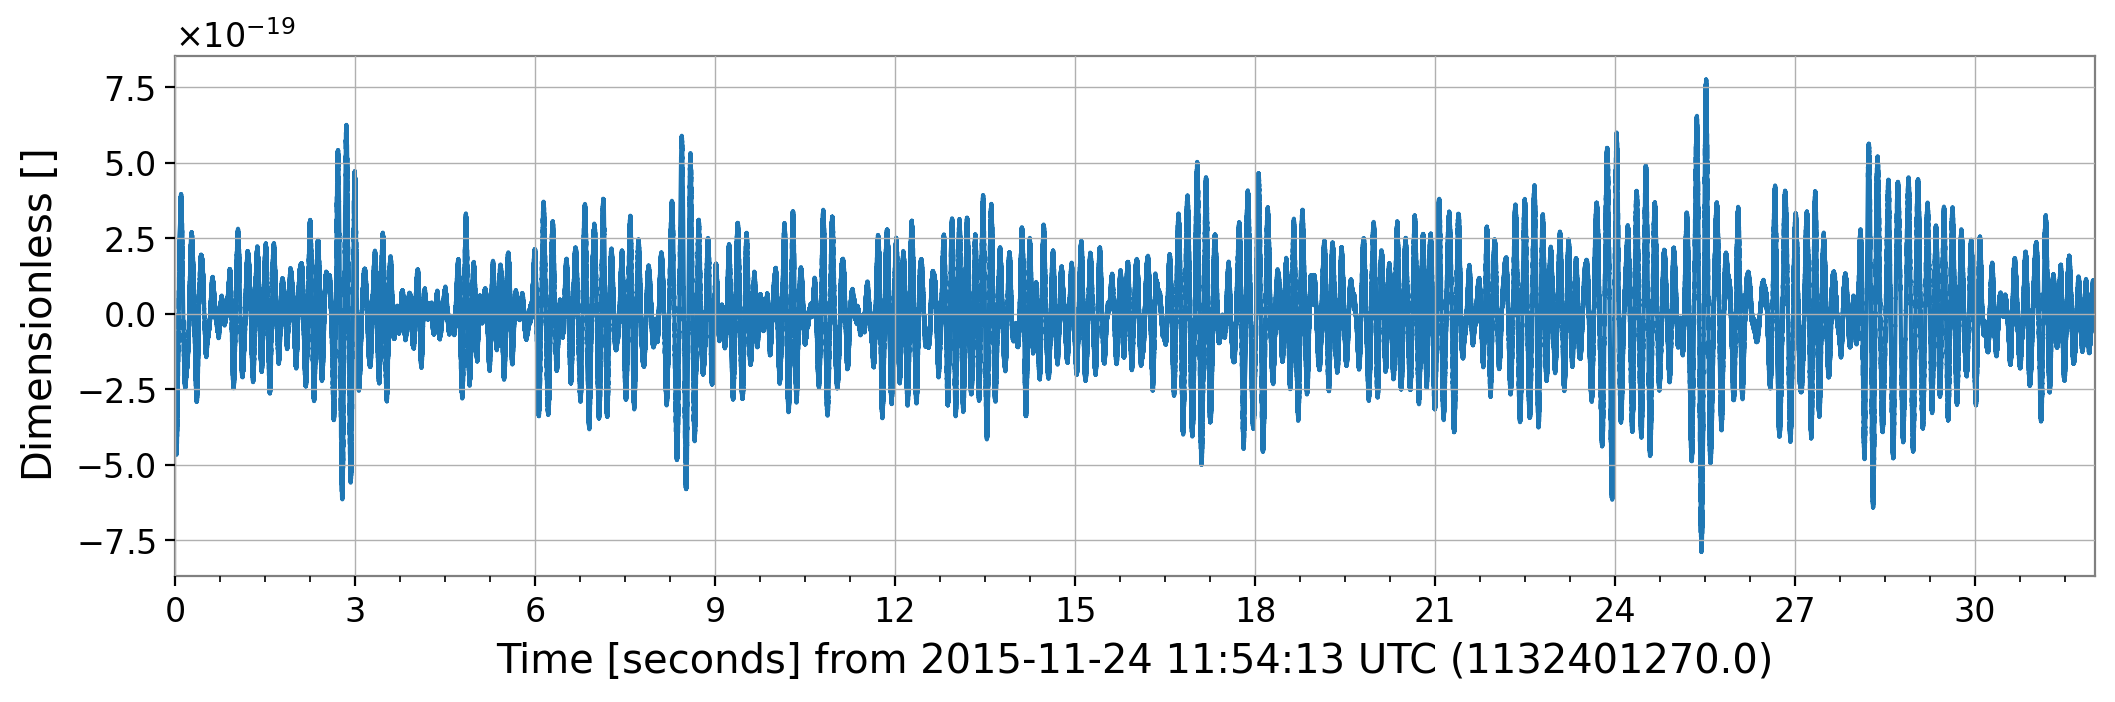

In [7]:
# -- Read strain data
strain = TimeSeries.read(fn,format='hdf5.gwosc')
center = int(t0)
strain = strain.crop(center-16, center+16)
fig1 = strain.plot()

(1e-24, 1e-19)

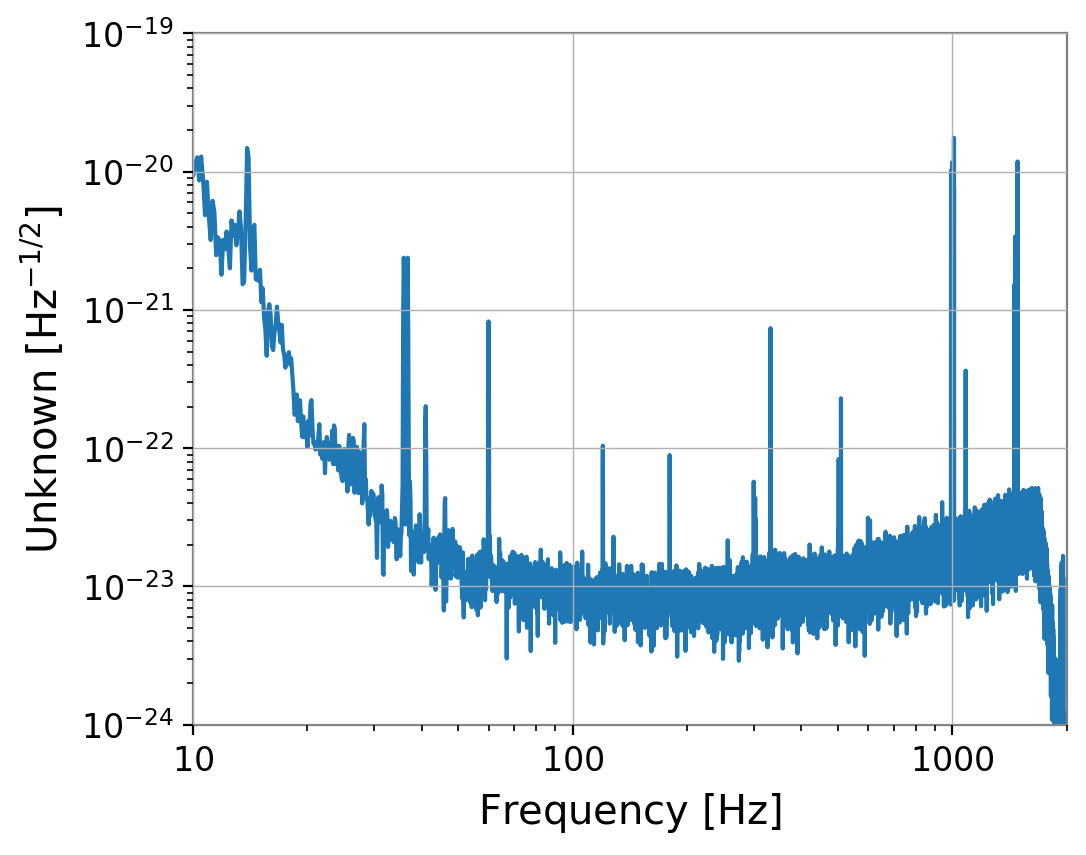

In [8]:
# -- Plot ASD
fig2 = strain.asd(fftlength=8).plot()
plt.xlim(10,2000)
plt.ylim(1e-24, 1e-19)

(1132401286.1299999, 1132401286.4299998)

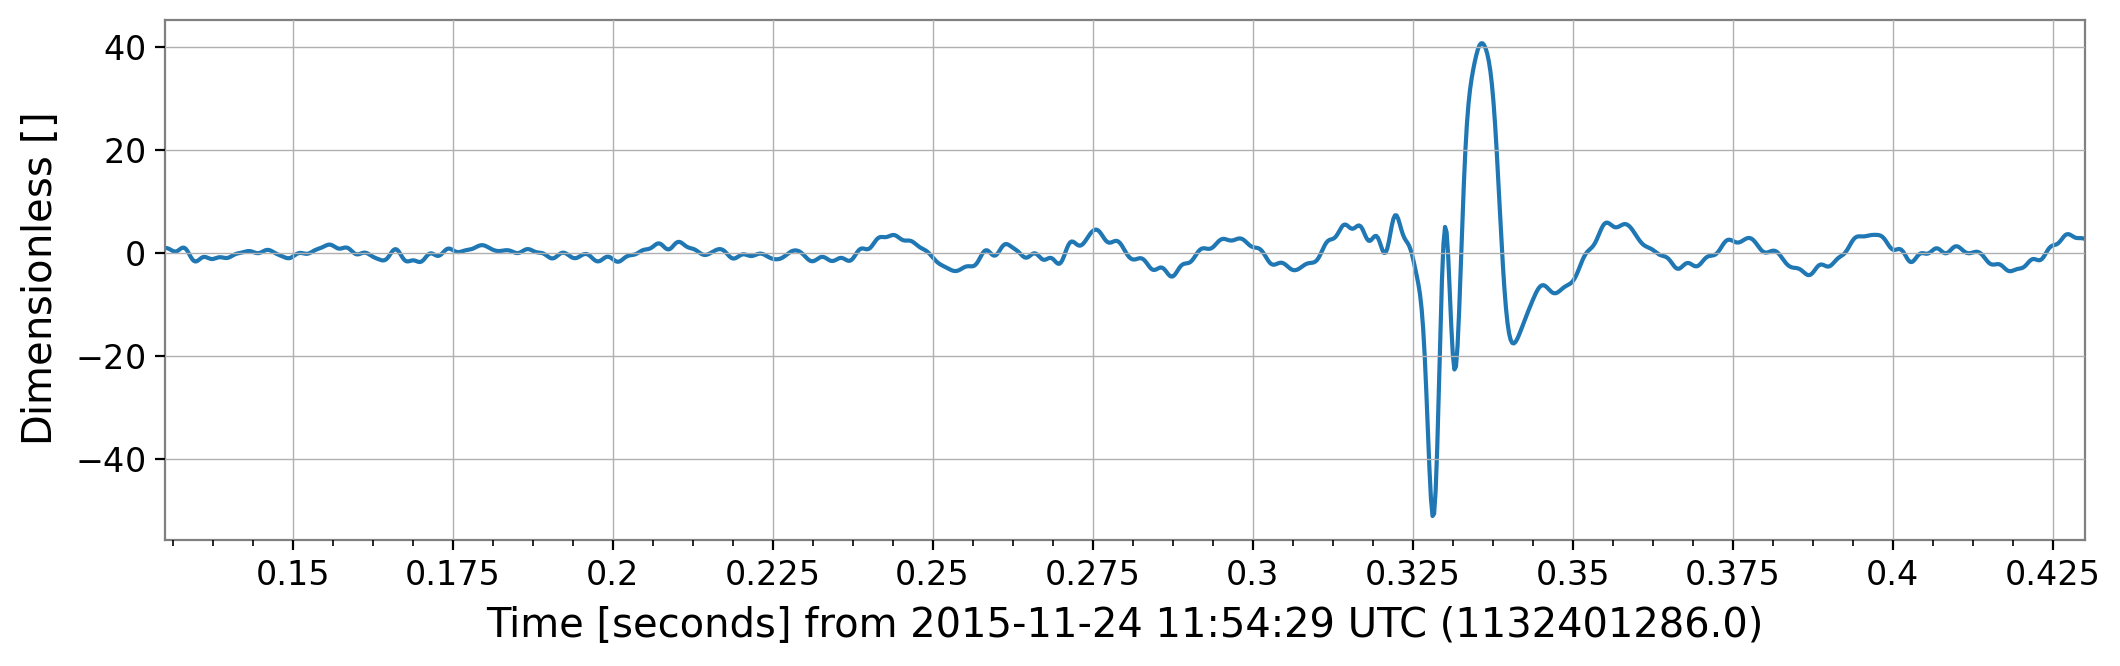

In [9]:
# -- Whiten and bandpass data
white_data = strain.whiten()
bp_data = white_data.bandpass(30, 400)
fig3 = bp_data.plot()
plt.xlim(t0-0.2, t0+0.1)

KeyError: ignored

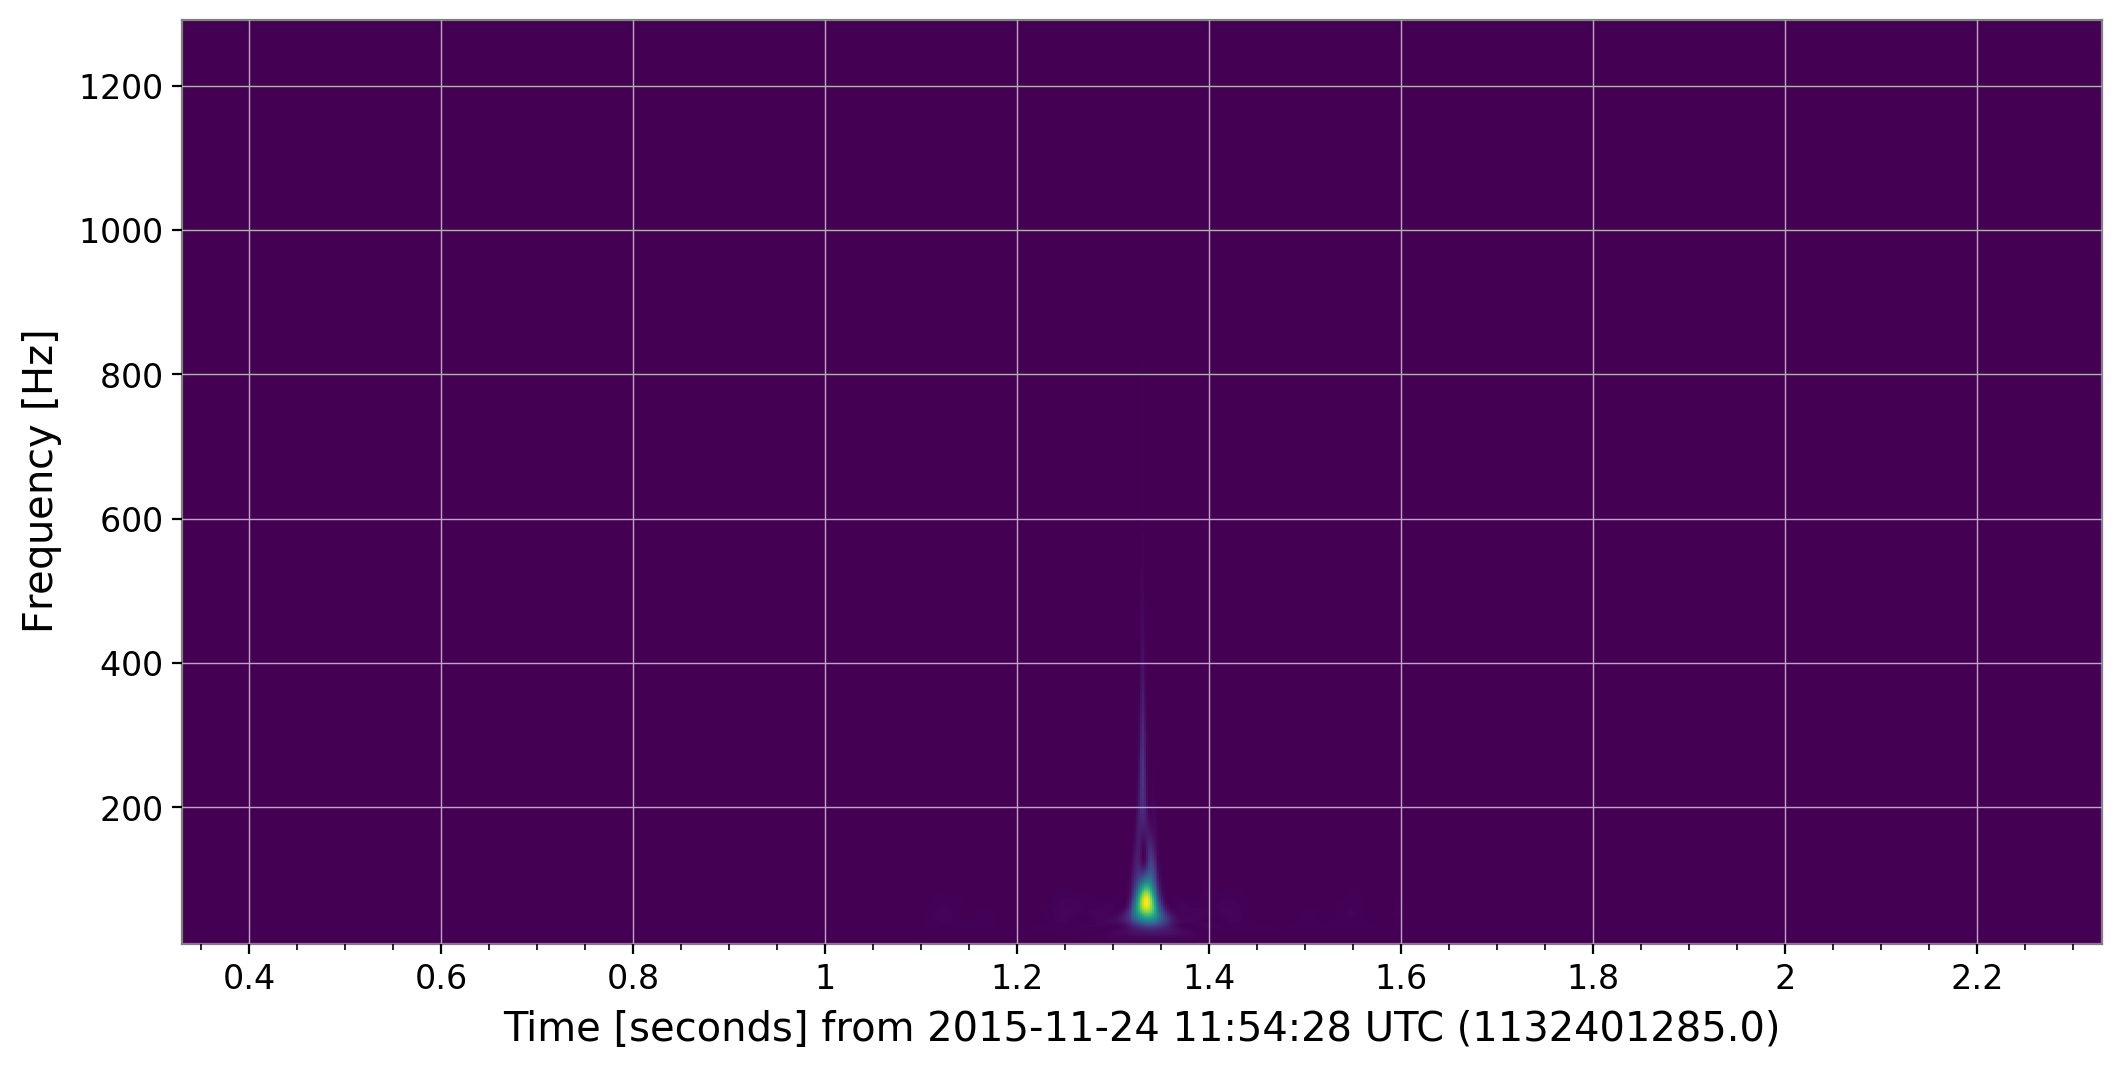

In [10]:
dt = 1  #-- Set width of q-transform plot, in seconds
hq = strain.q_transform(outseg=(t0-dt, t0+dt))
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalized energy")
ax.grid(False)
ax.set_yscale('log')

#Anomaly Detection Arrangements

The simplest anomaly detection was tried to be made with the Isolation Forest method. The main purpose here is to measure the quality of the sections. Will the section exposed to anomaly detection show similar features at every point independent of deviations? It has been tried to be shown in graphics.

In the second step, you will see the zoomed anomaly graph. Although it may seem pointless, it is important to see its frequency.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


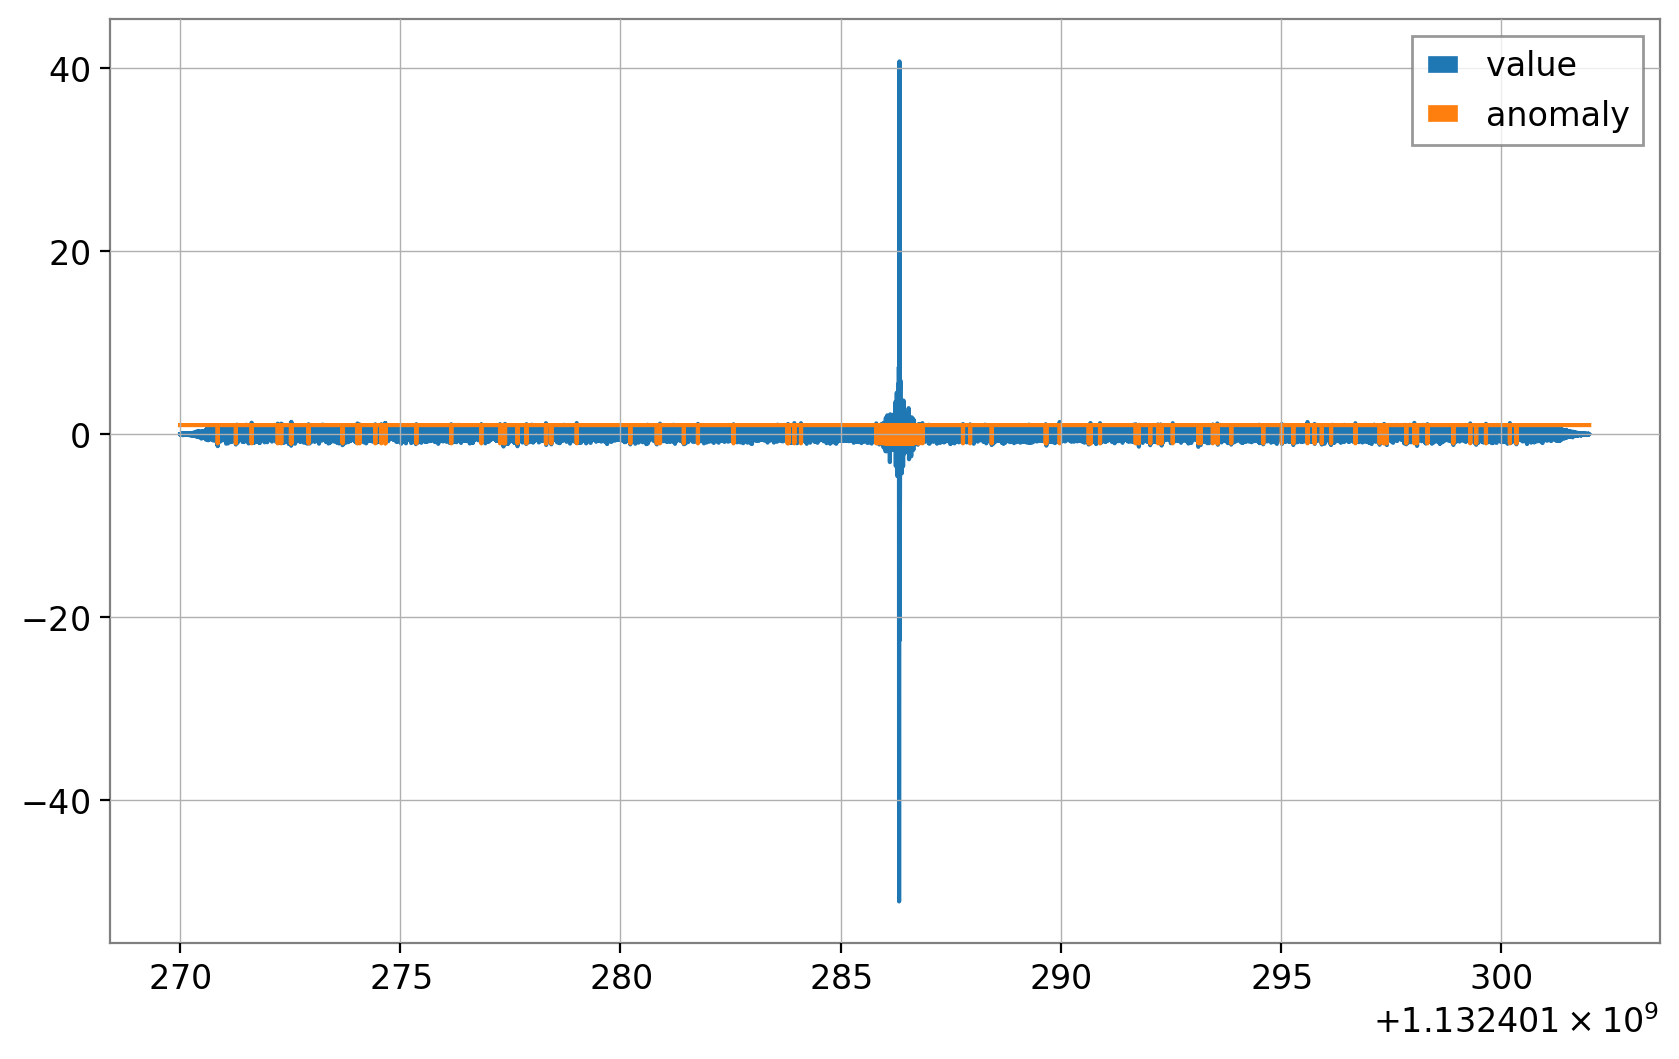

In [13]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np


data = np.array(bp_data.value) # The variable 'bp_data' contains whiten and bandpassed data.

data = pd.DataFrame(data, columns=['value'])

model = IsolationForest(contamination=0.01) # contamination parameter assumes that 1% of the data is anomaly. Generating the model.
model.fit(data)

data['anomaly'] = model.predict(data) #Make anomaly predictions. Outputs '1' for normal data and '-1' for anomalies are expected.

#Visualization of anomalies for basic plots
plt.figure(figsize=(10, 6))
plt.plot(bp_data.times.value, data['value'], label='value')
plt.plot(bp_data.times.value, data['anomaly'], label='anomaly')
plt.legend()
plt.show()

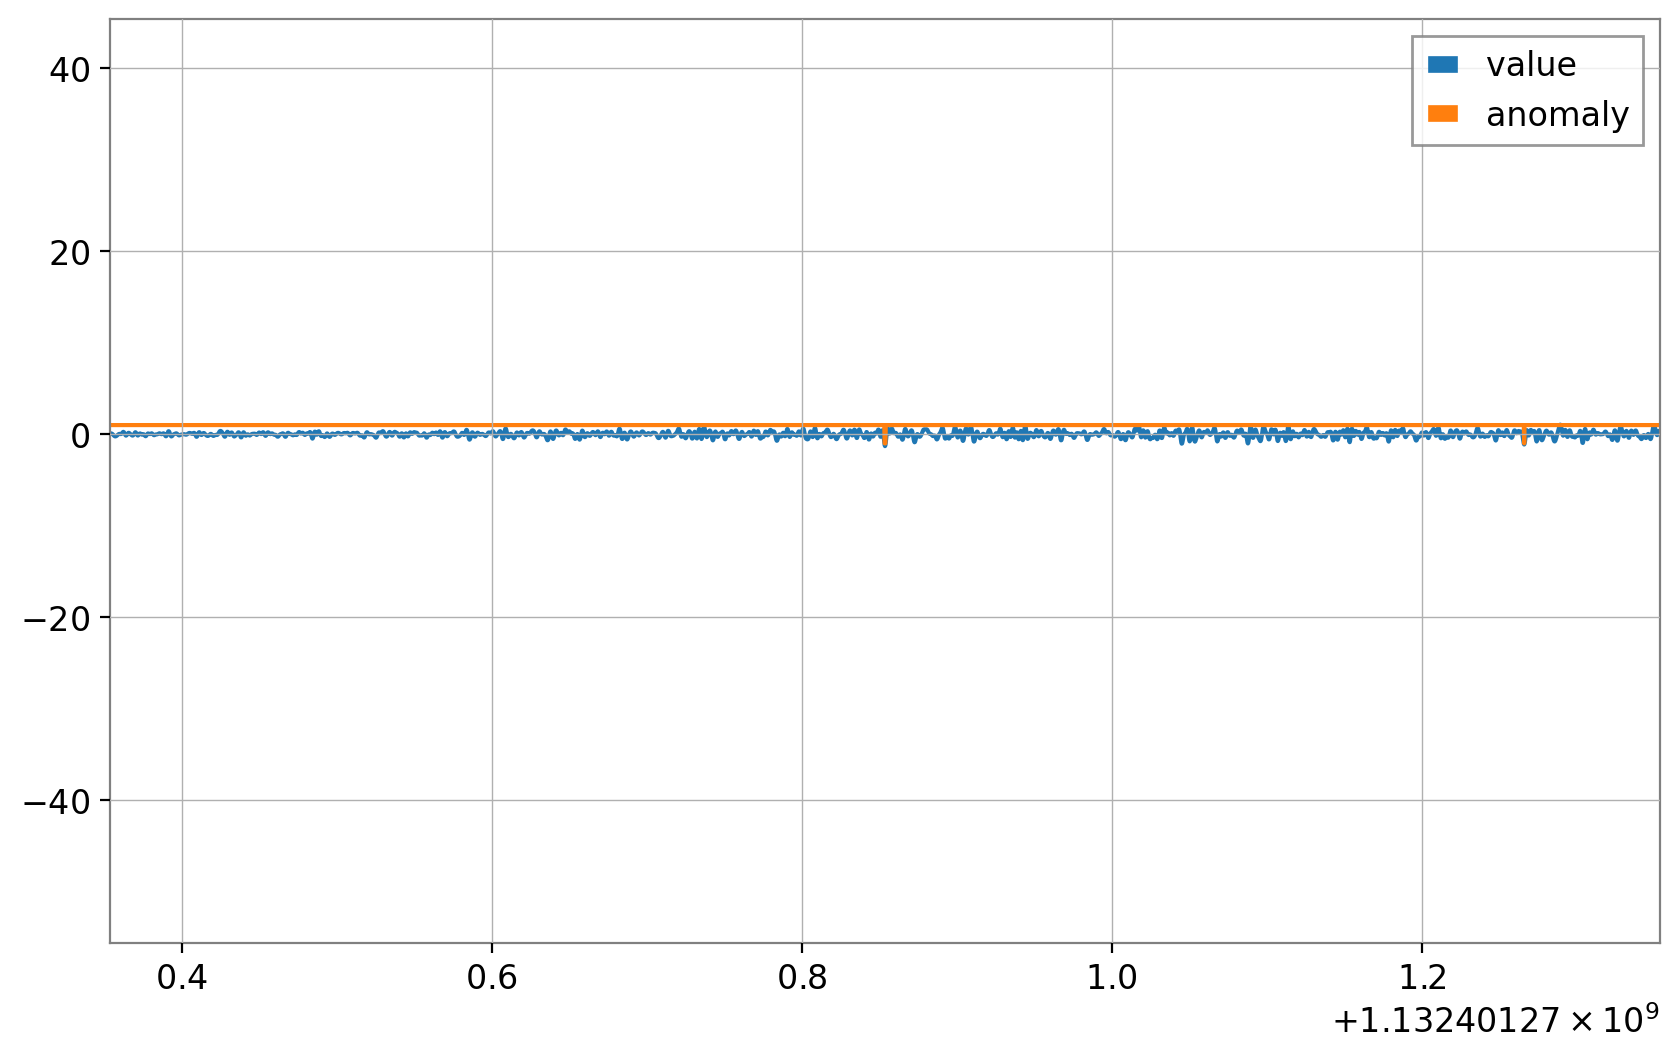

In [14]:
#Anomaly points
anomalies = data[data['anomaly'] == -1]
start_time = bp_data.times.value[anomalies.index[0]] - 0.5  # Adding anomly time series (absctraction time series)
end_time = bp_data.times.value[anomalies.index[0]] + 0.5

# Zoomed anomaly
plt.figure(figsize=(10, 6))
plt.plot(bp_data.times.value, data['value'], label='value')
plt.plot(bp_data.times.value, data['anomaly'], label='anomaly')
plt.xlim(start_time, end_time)  #determining the limit
plt.legend()
plt.show()

#Synthetic (Artificial) Data

**Adding Synthetic (Artificial) Data**: 3 different method

- Generated with (GAN) Generative Adversarial Network,

- Generated with Random Numerical Methods,

- Generated with Gaussian Mixed Method.

In [19]:
#Time series examples
synthetic_times = resample(bp_data.times.value, replace=True, random_state=1)
synthetic_values = resample(bp_data.value, replace=True, random_state=1)

In [20]:
synthetic_data = pd.DataFrame({
    'times': synthetic_times,
    'values': synthetic_values
})

# Adding Synthetic Data
extended_data = pd.concat([data, synthetic_data])
extended_data = extended_data.sort_values(by='times')

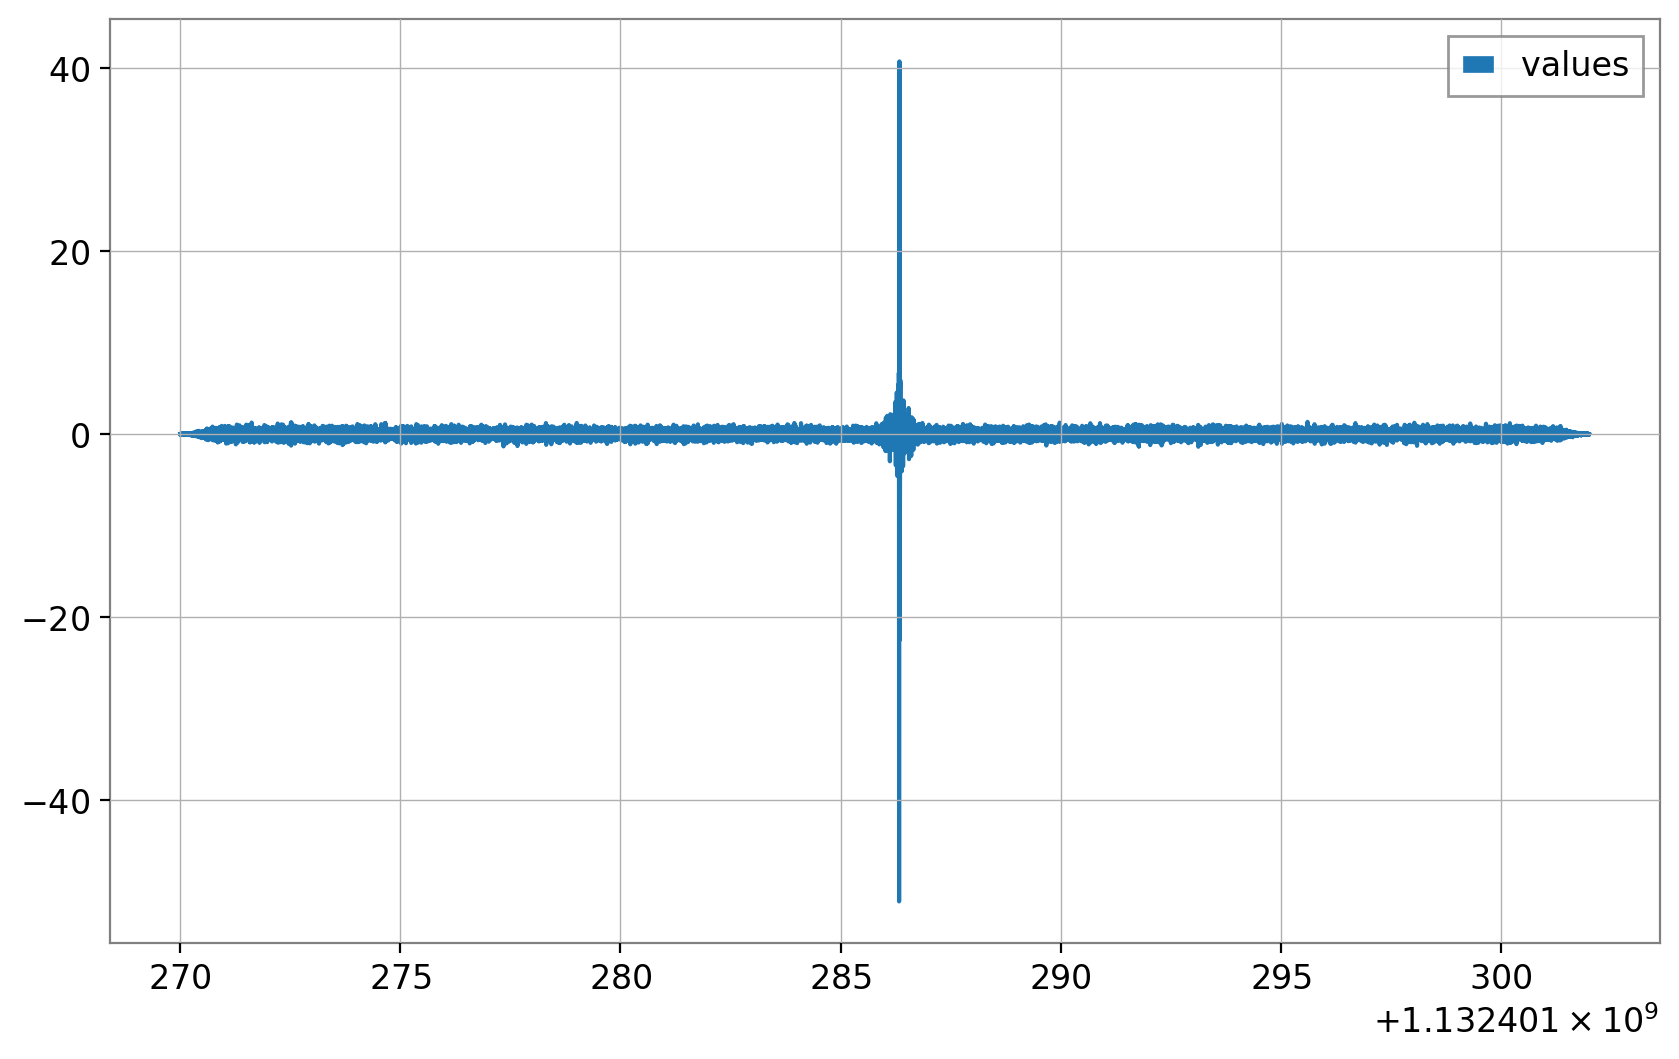

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(extended_data['times'], extended_data['values'], label='values')
plt.legend()
plt.show()

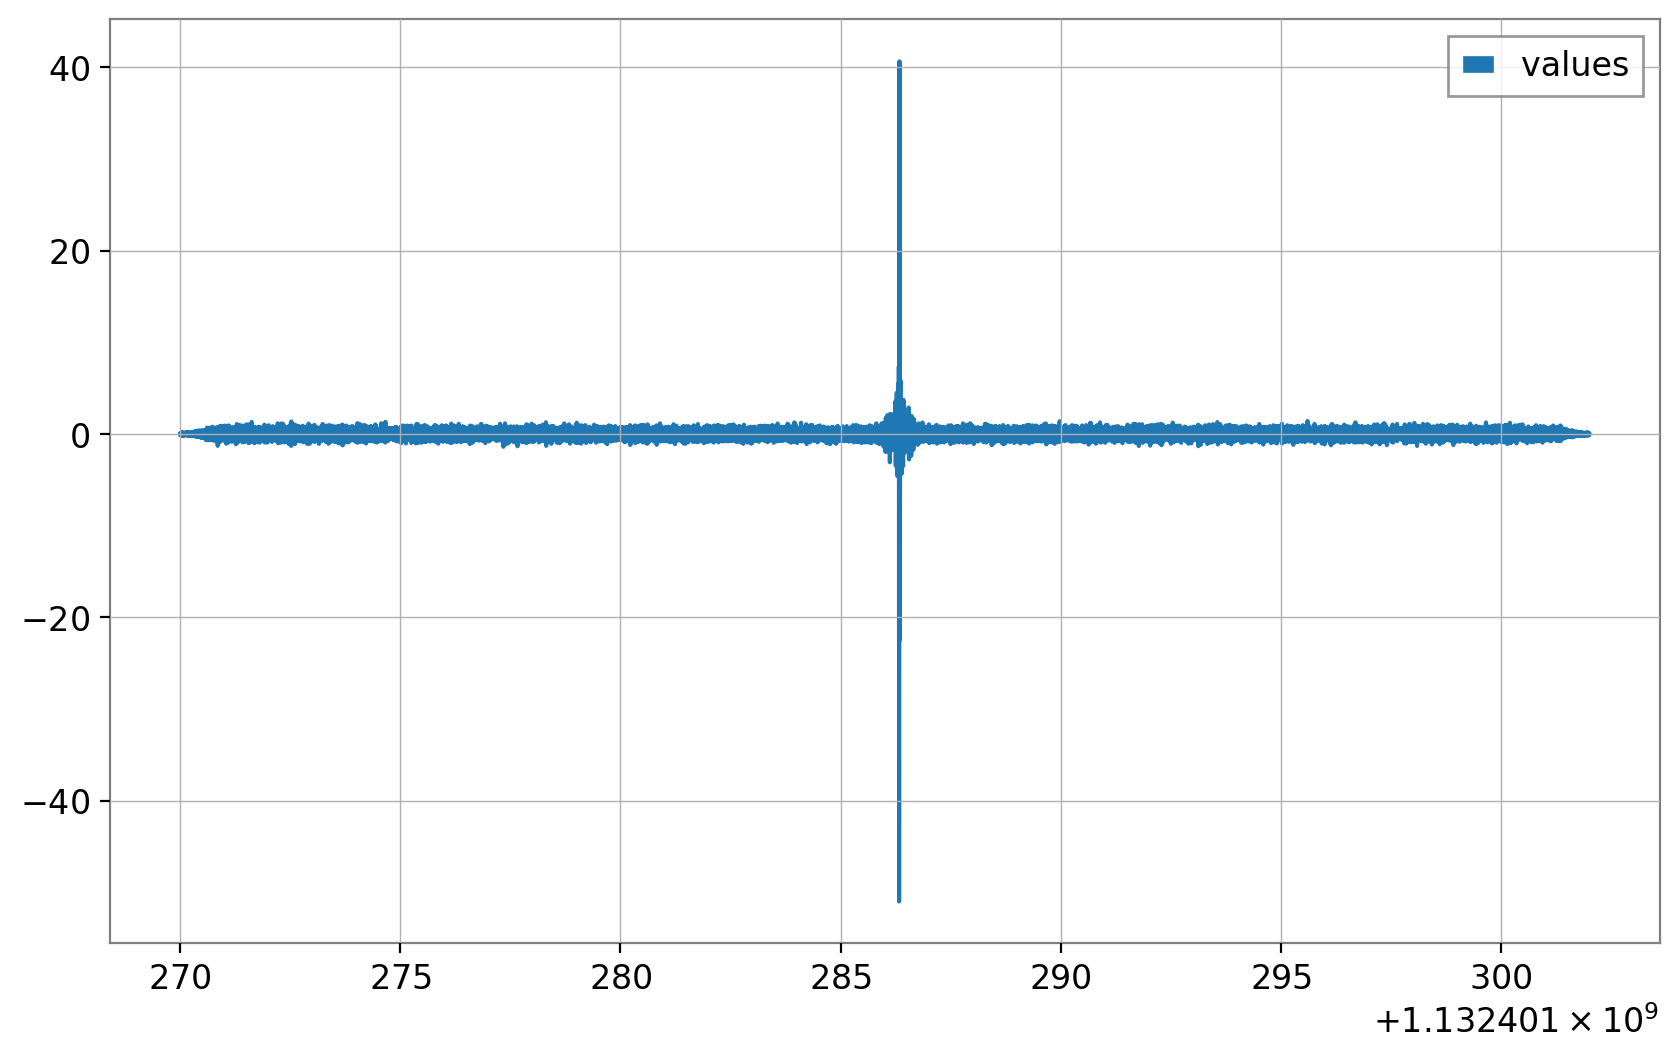

In [22]:
# Adding noises
noise_factor = 0.05
bp_data_noise = bp_data + noise_factor * np.random.normal(size=bp_data.shape)

synthetic_data_noise = pd.DataFrame({
    'times': bp_data.times.value,
    'values': bp_data_noise.value
})

extended_data_noise = pd.concat([data, synthetic_data_noise])
extended_data_noise = extended_data_noise.sort_values(by='times')
plt.figure(figsize=(10, 6))
plt.plot(extended_data_noise['times'], extended_data_noise['values'], label='values')
plt.legend()
plt.show()


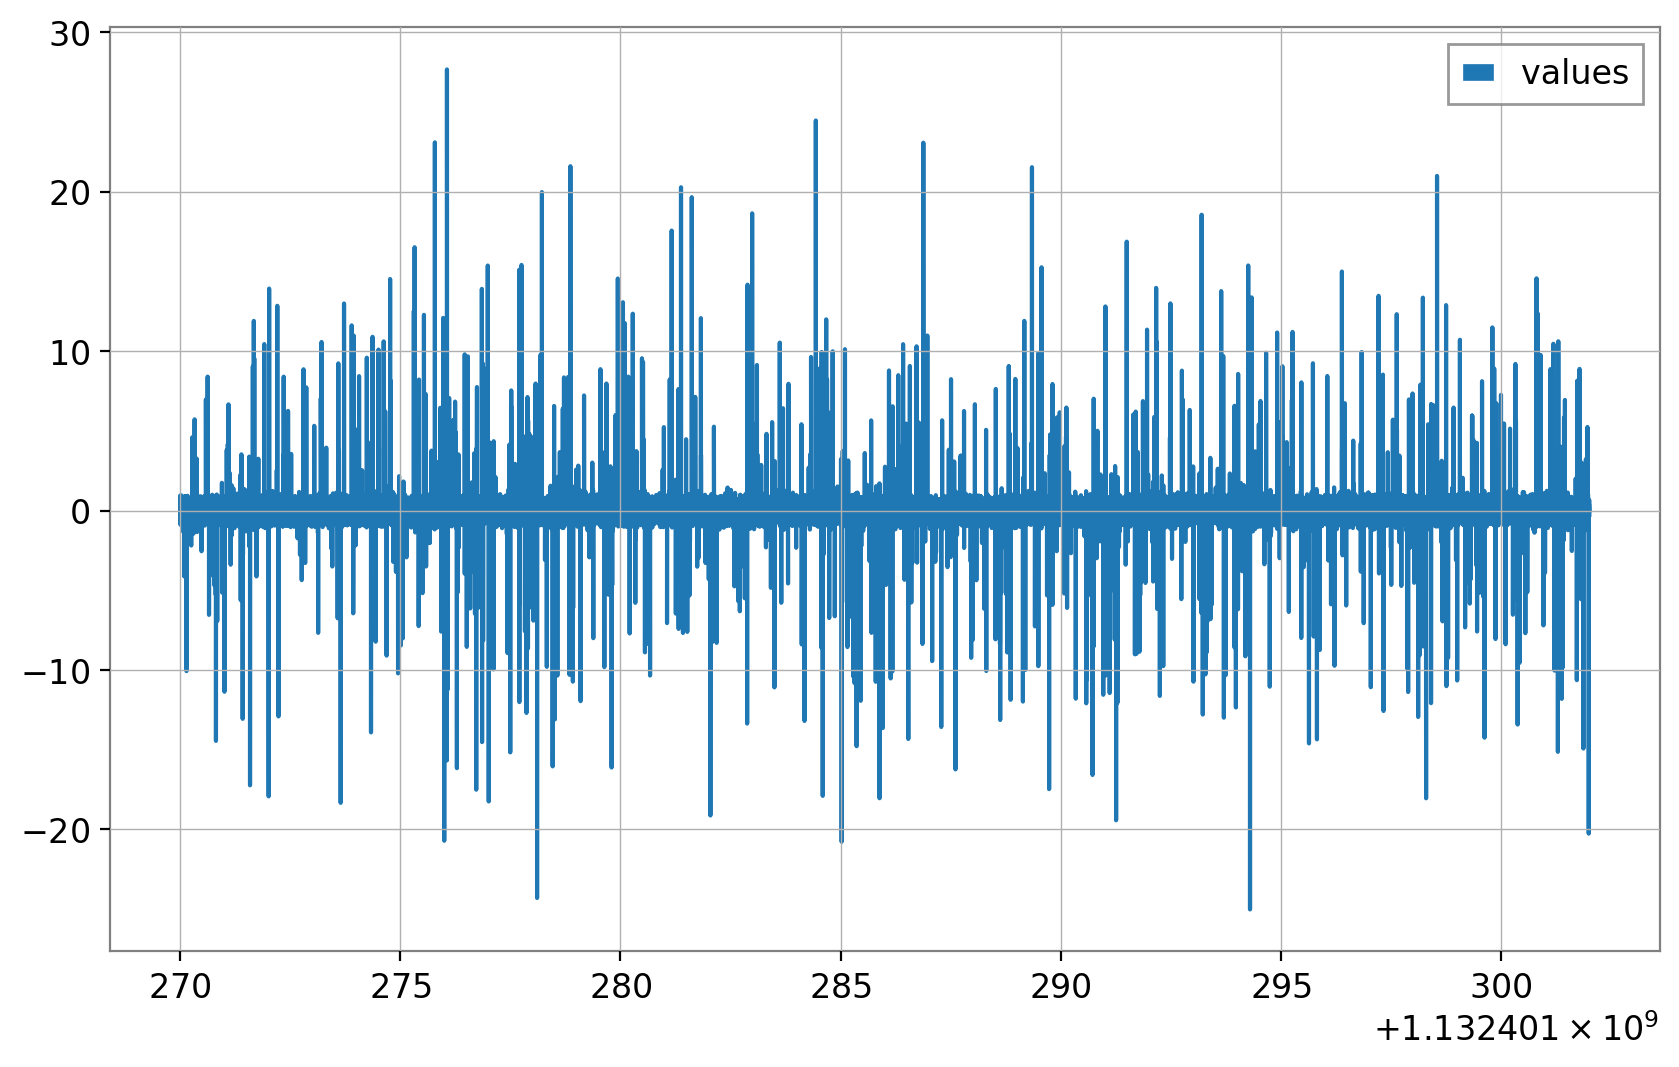

In [24]:
from sklearn.mixture import GaussianMixture

#Generating mixture model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(data[['value']].values)

#Pulling samples
synthetic_values = gmm.sample(data.shape[0])[0]

synthetic_data_gmm = pd.DataFrame({
    'times': np.random.choice(bp_data.times.value, size=data.shape[0]),  # In this true value for times series
    'values': synthetic_values.flatten()
})

extended_data_gmm = pd.concat([data, synthetic_data_gmm])
extended_data_gmm = extended_data_gmm.sort_values(by='times')

plt.figure(figsize=(10, 6))
plt.plot(extended_data_gmm['times'], extended_data_gmm['values'], label='values')
plt.legend()
plt.show()